In [16]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [18]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
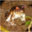

In [19]:
X_train[0]

In [20]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [41]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [42]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


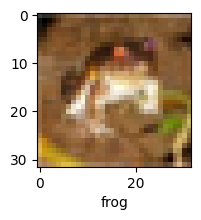

In [43]:
plot_sample(X_train,y_train,0)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.3985 - loss: 1.6649
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6088 - loss: 1.1099
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6650 - loss: 0.9689
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6997 - loss: 0.8685
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7275 - loss: 0.7878


In [29]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6872 - loss: 0.9201


[0.9353629946708679, 0.6804999709129333]

In [30]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [36]:
y_test = y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


array([[1.2818691e-03, 1.5024949e-03, 5.9804916e-03, 6.5797806e-01,
        5.9752440e-04, 3.0508158e-01, 6.1280569e-03, 9.8359794e-04,
        1.9807141e-02, 6.5922196e-04],
       [4.1950261e-03, 1.9092076e-01, 8.1672370e-05, 2.6346557e-05,
        5.6175841e-06, 9.3650206e-06, 3.3769581e-06, 8.8445927e-07,
        7.9814762e-01, 6.6092196e-03],
       [2.3106394e-02, 2.3137382e-01, 4.2003309e-03, 1.7920762e-02,
        3.2339612e-04, 4.1279569e-03, 1.3368396e-03, 8.0502999e-04,
        6.8669236e-01, 3.0113019e-02],
       [6.7644668e-01, 6.4924218e-02, 5.3922392e-02, 5.7257907e-03,
        1.6703408e-02, 3.6460444e-04, 5.1452708e-04, 1.8106570e-04,
        1.8083851e-01, 3.7875929e-04],
       [3.4334817e-06, 1.1839425e-03, 2.4385102e-02, 2.6756322e-02,
        1.5056175e-01, 1.0032847e-02, 7.8689975e-01, 1.7783279e-05,
        1.3306917e-04, 2.6045418e-05]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

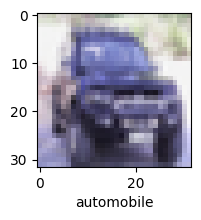

In [48]:
plot_sample(X_test,y_test,9)

In [50]:
classes[y_classes[9]]

'automobile'

In [54]:
from sklearn.metrics import classification_report
print('Classification Report : \n', classification_report(y_test, y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.62      0.70      1000
           1       0.77      0.85      0.80      1000
           2       0.50      0.68      0.57      1000
           3       0.56      0.42      0.48      1000
           4       0.75      0.48      0.59      1000
           5       0.55      0.63      0.59      1000
           6       0.70      0.81      0.75      1000
           7       0.71      0.76      0.73      1000
           8       0.80      0.79      0.79      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

